In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function

In [2]:
shop_info=pd.read_csv('../dataset/shop_info.txt',header=None)
shop_col=['shop_id', 'city_name', 'location', 'per_pay', 'score', 'cmt_cnt', 'shop_lvl', 'cate_1', 'cate_2', 'cate_3']
shop_info.columns=shop_col
shop_info.head()

,shop_id,city_name,location,per_pay,score,cmt_cnt,shop_lvl,cate_1,cate_2,cate_3
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果


In [3]:
data_col=['user_id','shop_id','time_stamp']

In [4]:
data_pay=pd.read_csv('../dataset/user_pay.txt',header=None)

data_pay.columns=data_col

In [5]:
data_pay.tail()

,user_id,shop_id,time_stamp
69674105,15330495,766,2016-08-21 19:00:00
69674106,8556331,766,2016-08-11 20:00:00
69674107,11429329,766,2016-09-18 18:00:00
69674108,11429329,766,2016-10-02 20:00:00
69674109,22602094,766,2016-10-13 13:00:00


In [6]:
data_pay.time_stamp=pd.to_datetime(data_pay.time_stamp, format='%Y/%m/%d %H:%M:%S')


In [7]:
data_pay['date'] = data_pay.time_stamp.dt.date
data_pay.head()

,user_id,shop_id,time_stamp,date
0,22127870,1862,2015-12-25 17:00:00,2015-12-25
1,3434231,1862,2016-10-05 11:00:00,2016-10-05
2,16955285,1862,2016-02-10 15:00:00,2016-02-10
3,13799128,1862,2016-01-13 14:00:00,2016-01-13
4,13799128,1862,2016-07-05 12:00:00,2016-07-05


In [8]:
shop_pay_day=pd.DataFrame({'payday': data_pay.groupby(['shop_id', 'date'])['user_id'].count()}).reset_index()

In [9]:
shop_pay_day=shop_pay_day.pivot(index='shop_id',columns='date',values='payday').reset_index()
shop_pay_day.head()

date,shop_id,2015-06-26,2015-06-27,2015-06-28,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-04,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,NaN,215.0,203.0,291.0,239.0


In [10]:
shop_pay_day.drop(shop_pay_day.columns[[1,2,3,4,5]], axis=1, inplace=True)

In [11]:
import matplotlib.pyplot as plt
tmp = shop_pay_day.copy()
# tmp=tmp.fillna(0)
tmp.head()


date,shop_id,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,NaN,215.0,203.0,291.0,239.0


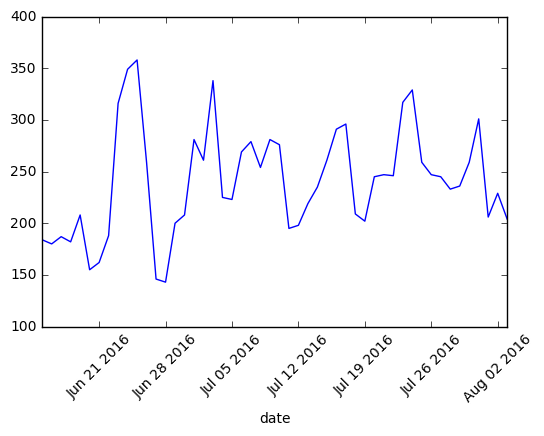

In [12]:
from pandas.tools.plotting import autocorrelation_plot
tmp.iloc[128, 350:400].plot()
plt.xticks(rotation=45)
plt.show()

In [13]:
# tmp = shop_pay_day.copy()
# tmp.merge(shop_info, on='shop_id')


In [14]:
shop_pay_day.to_csv('../tempfile/shop_pay_everyday.csv', index=False, header=False)

In [15]:
shop_pay_day.head()

date,shop_id,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,NaN,215.0,203.0,291.0,239.0


In [16]:
def shop_open_rate_lower_than(shop_data, rate):
    _, col = shop_data.shape
    shops_open_rate_lower = []
    for index, row in shop_data.iterrows():
#     for index, row in [(125, shop_data.iloc[125])]:
        date_count, open_count = 0, 0
        has_record = False
        for j in range(col-1):
            j = j+1 #first col is shop id
            if pd.notnull(row[j]):
#                 if pd.isnull(row[j-1]):
#                     print(j)
                has_record = True
            if has_record is True:
                date_count += 1
                if (pd.notnull(row[j])):
                    open_count += 1
        print(str(open_count) + ' ' + str(date_count))
        if open_count * 1.0 / date_count < rate:
            shops_open_rate_lower.append(index+1)
    return shops_open_rate_lower
            

In [17]:
low_openrate_shops = shop_open_rate_lower_than(shop_pay_day, 0.75)
# low_openrate_shops


387 387
329 341
136 136
105 105
202 399
272 284
482 487
92 92
367 367
123 123
413 433
262 273
205 216
441 441
111 111
486 487
475 476
88 89
387 387
214 214
290 294
418 439
350 353
252 256
476 476
387 387
389 397
435 473
302 337
242 242
105 105
341 348
89 89
286 290
353 353
349 349
404 404
350 350
360 473
135 135
404 404
181 183
243 243
251 251
91 91
348 348
104 113
96 96
325 355
100 100
395 459
246 246
137 137
343 345
277 277
475 476
403 403
367 367
137 137
395 395
173 173
450 482
151 151
252 398
318 346
346 350
218 219
106 106
183 188
123 123
269 275
332 347
87 87
283 284
99 220
237 239
162 162
181 181
423 427
154 156
320 355
473 479
472 483
254 255
481 481
374 375
323 350
488 488
350 353
483 483
119 119
342 346
142 164
172 338
202 203
119 119
125 129
224 229
280 394
341 341
418 479
92 101
151 151
475 475
483 483
350 350
439 457
404 404
155 168
171 171
387 387
354 354
171 172
404 404
133 141
99 139
347 348
155 242
243 243
96 134
478 482
246 246
375 375
367 367
243 243
176 397
316 329


In [18]:
shop_pay_day.iloc[125]

date
shop_id       126.0
2015-07-01      NaN
2015-07-02      NaN
2015-07-03      NaN
2015-07-04      NaN
2015-07-05      NaN
2015-07-06      NaN
2015-07-07      NaN
2015-07-08      NaN
2015-07-09      NaN
2015-07-10      NaN
2015-07-11      NaN
2015-07-12      NaN
2015-07-13      NaN
2015-07-14      NaN
2015-07-15      NaN
2015-07-16      NaN
2015-07-17      NaN
2015-07-18      NaN
2015-07-19      NaN
2015-07-20      NaN
2015-07-21      NaN
2015-07-22      NaN
2015-07-23      NaN
2015-07-24      NaN
2015-07-25      NaN
2015-07-26      NaN
2015-07-27      NaN
2015-07-28      NaN
2015-07-29      NaN
              ...  
2016-10-02     66.0
2016-10-03     51.0
2016-10-04     60.0
2016-10-05     62.0
2016-10-06     87.0
2016-10-07     90.0
2016-10-08     85.0
2016-10-09     63.0
2016-10-10     87.0
2016-10-11     95.0
2016-10-12     84.0
2016-10-13     97.0
2016-10-14    105.0
2016-10-15    106.0
2016-10-16     95.0
2016-10-17    110.0
2016-10-18    124.0
2016-10-19    115.0
2016-10-20    1

In [19]:
tmp_row = shop_pay_day.iloc[125, 1:].copy()
tmp_row = tmp_row.interpolate()
tmp_row


date
2015-07-01      NaN
2015-07-02      NaN
2015-07-03      NaN
2015-07-04      NaN
2015-07-05      NaN
2015-07-06      NaN
2015-07-07      NaN
2015-07-08      NaN
2015-07-09      NaN
2015-07-10      NaN
2015-07-11      NaN
2015-07-12      NaN
2015-07-13      NaN
2015-07-14      NaN
2015-07-15      NaN
2015-07-16      NaN
2015-07-17      NaN
2015-07-18      NaN
2015-07-19      NaN
2015-07-20      NaN
2015-07-21      NaN
2015-07-22      NaN
2015-07-23      NaN
2015-07-24      NaN
2015-07-25      NaN
2015-07-26      NaN
2015-07-27      NaN
2015-07-28      NaN
2015-07-29      NaN
2015-07-30      NaN
              ...  
2016-10-02     66.0
2016-10-03     51.0
2016-10-04     60.0
2016-10-05     62.0
2016-10-06     87.0
2016-10-07     90.0
2016-10-08     85.0
2016-10-09     63.0
2016-10-10     87.0
2016-10-11     95.0
2016-10-12     84.0
2016-10-13     97.0
2016-10-14    105.0
2016-10-15    106.0
2016-10-16     95.0
2016-10-17    110.0
2016-10-18    124.0
2016-10-19    115.0
2016-10-20    1

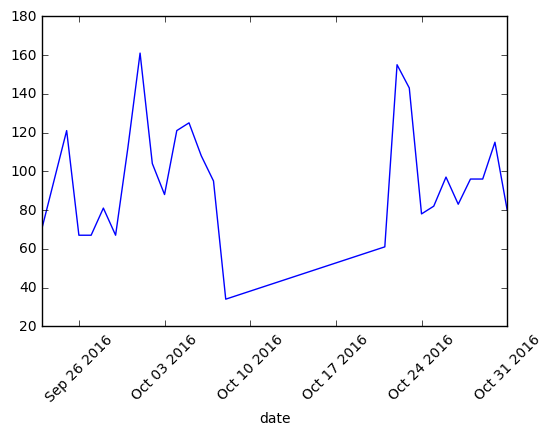

In [24]:
tmp_row = tmp_df.iloc[1, 450:]

# shop_pay_day.iloc[125]
# shop_pay_day.iloc[124, 1:].plot()
# tmp_row = tmp_row.interpolate()
tmp_row.plot()
plt.xticks(rotation=45)
plt.show()

In [22]:
def my_impute(shop_data):
    for index, row in shop_data.iterrows():
        shop_data.iloc[index, 1:] = row[1:].interpolate()

tmp_df = shop_pay_day.copy()
my_impute(tmp_df)
tmp_df

date,shop_id,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,108.0,215.0,203.0,291.0,239.0
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,76.0,104.0,97.0,100.0,117.0,133.0,109.0,118.0,86.0
6,7,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,152.0,200.0,124.0,128.0,115.0,111.0,128.0,165.0,162.0,81.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,89.0,68.0,70.0,68.0,72.0,49.0,70.0,71.0,35.0
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.0,310.0,246.0,210.0,197.0,245.0,205.0,291.0,283.0,212.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,115.0,60.0,77.0,114.0,85.0,84.0,99.0,93.0,121.0


In [25]:
shop_pay_day.to_csv('../tempfile/shop_pay_everyday.csv')
tmp_df.to_csv('../tempfile/shop_pay_everyday_imputed.csv')

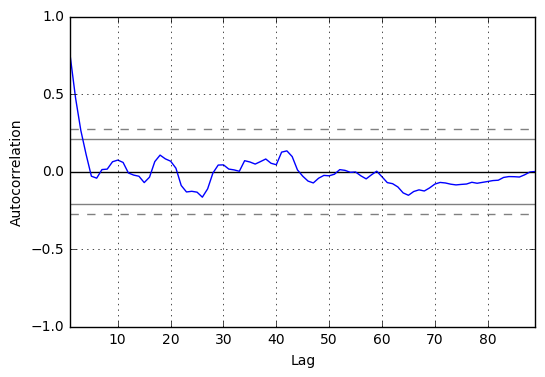

In [26]:
from statsmodels.tsa.arima_model import ARIMA

autocorrelation_plot(tmp_df.iloc[124, 400:])
plt.show()

In [77]:
def ARIMA_prediction(shop_data_row, predict_len=7):
    
    first_open_day = 0
    prediction = []
    index = 0
    for _, series_val in shop_data_row.iteritems():
        if pd.isnull(series_val):
            index += 1
            continue
        else:
            first_open_day = index
            break
    history = (shop_data_row.iloc[first_open_day:]).values    
#     history.index = pd.to_datetime(history.index, format='%Y-%m-%d')
#     print(first_open_day)
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=predict_len)
    return list(output[0])

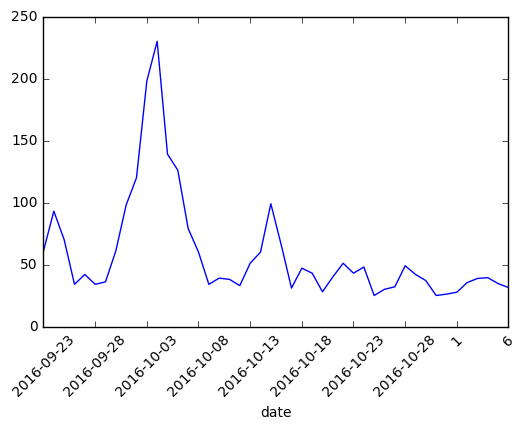

In [78]:
predict = ARIMA_prediction(shop_pay_day.iloc[124, 1:])
data_and_predict = (shop_pay_day.iloc[124, 450:].copy()).append(pd.Series(predict))
data_and_predict.plot()
plt.xticks(rotation=45)
plt.show()

In [79]:
predict_all = pd.DataFrame()
for row_index, shop_data_row in tmp_df.iterrows():
    predict_all[row_index] = ARIMA_prediction(shop_data_row.iloc[1:])
predict_all.index = predict_all.index + 1
predict_all

/Users/yangpinz/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1,208.613174,67.713604,68.351827,113.270886,214.733098,104.828583,101.385256,51.629936,213.311316,109.752306,...,123.028292,66.286954,56.369937,147.325884,67.792076,97.280680,319.318767,695.718138,302.921280,197.068819
2,214.379545,87.041705,74.583767,107.926570,211.875490,106.109648,101.785010,57.027433,238.725221,106.867052,...,118.721755,77.109305,75.952877,147.212881,70.757932,98.738977,284.726268,635.462024,301.447326,157.644721
3,226.341352,90.867118,86.958036,88.375899,218.657979,108.570162,113.361889,55.470937,228.880598,110.649062,...,120.239450,70.394721,66.366307,143.655050,71.903248,100.950744,266.727567,631.286928,317.613198,145.235140
4,222.371562,89.095777,92.153971,137.772969,222.525884,104.069381,123.850522,52.239245,247.965713,114.719636,...,120.378291,84.342517,62.343381,144.672338,74.019490,102.112715,237.546337,653.728774,286.206879,128.060469
5,228.879821,91.877749,91.503357,191.694914,226.531405,106.952149,123.802308,53.298006,259.074390,111.490049,...,118.389964,98.907624,75.731143,145.040549,73.984685,102.431057,166.585027,553.321772,319.436106,95.968690
6,218.713868,87.447097,81.914039,156.716785,226.306245,105.742197,116.193523,48.304196,239.814495,113.007575,...,121.788145,88.850065,63.748423,145.675645,71.697479,101.270486,205.087386,516.635269,324.609828,114.738203
7,219.971875,83.236065,78.322281,117.478424,225.075922,106.976259,114.299399,49.949702,231.156915,115.169677,...,121.854027,80.328938,61.674675,145.599746,72.239166,102.227897,267.282334,575.916261,319.397577,157.568100


In [91]:
predict_all.index.rename('days', inplace=True)
predict_all.reset_index()
tmp_df = predict_all.T


In [96]:
for i in range(7):
    tmp_df[i + 8] = tmp_df[i+1]
tmp_df = tmp_df.round(0).astype(int)

